<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

# Visualización de datos con gráficos complejos

Previamente vimos los tipos de gráficos más simples, que utilizan encoding visuales comunes. Sin embargo, podemos componer esos encodings visuales para representar más variables dentro de un mismo gráfico. Sin embargo, mientras más información estemos codificando, más compleja se vuelve nuestra visualización y necesitamos herramientas más poderosas.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.10.1'

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [16]:
# Con esto hacemos los gráficos más grandes, adecuados para las presentaciones.
seaborn.set_context(context='talk', font_scale=1.0)

In [17]:
dataset = pandas.read_csv('../data/dataset-ayvd2020.csv')

In [18]:
dataset.columns = [
    'timestamp', 
    'gender',
    'age',
    'zodiac_sign',
    'profession',
    'junior_programmer_salary',
    'senior_programmer_salary'
]

In [19]:
dataset.columns

Index(['timestamp', 'gender', 'age', 'zodiac_sign', 'profession',
       'junior_programmer_salary', 'senior_programmer_salary'],
      dtype='object')

## Heatmaps

Los heatmaps se utilizan para codificar la relación entre dos variables categóricas o discretas (o discretizadas). Si alguna de las variables es numérica, se puede discretizar o utilizar otro tipo de gráfico como `regplot`,  `pairplot` o `catplot`. 

Por ejemplo, una pregunta posible podría ser **¿Nuestra muestra, está uniformente distribuida en cuando a género y edad?**. Para hacer el análisis más fácil, usaremos la misma separación en segmentos que en la notebook anterior.

In [20]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    # print(intervals)
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

In [21]:
dataset = dataset[~dataset.age.isnull()]
dataset['age_segment'] = to_categorical(dataset.age)

En este tipo de situaciones con pocas categorías es ideal usar un heatmap. Sin embargo, no es tan intuitivo de hacer porque tenemos que pasar como argumento la matriz de co-ocurrencias ya previamente armada. Les recomendamos leer cómo funciona el comando `pandas.crosstab` para entender cómo funciona el siguiente código, aunque existen otras formas como `pivot`.

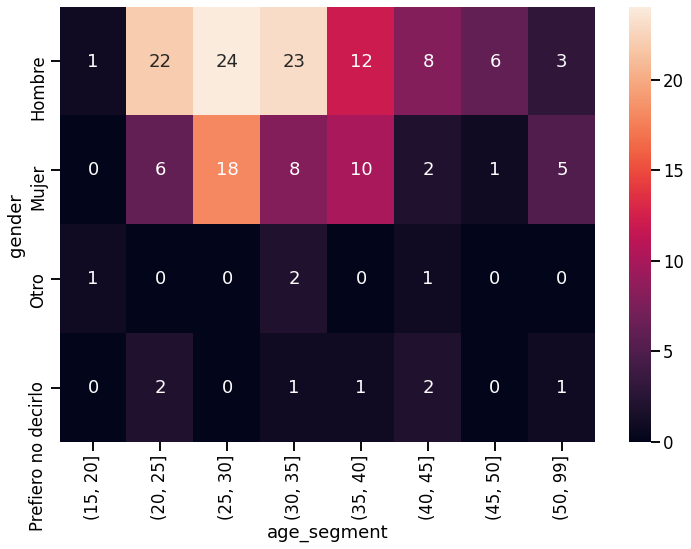

In [29]:
plt.figure(figsize=(12,8))
exp = pandas.crosstab(dataset.gender, dataset.age_segment)
seaborn.heatmap(exp, annot=True)
plt.xticks(rotation=90)
plt.show()

## Jointplots

En caso de que querramos estimar la correlación entre variables que sean numéricas, también se puede usar el `seaborn.jointplot`, pero no siempre logra un resultado interpretable.

Volvamos al ejemplo de la estimación de salarios con respecto a la edad de la persona. Haremos un jointplot con *kind=ked* y *kind=hex*. Con ambos gráficos podemos ver mejor las distribuciones que con el regplot, ya que los puntos individuales son agregados en una función de calor. Sin embargo, sucede lo mismo que con los heatmaps: no podemos asegurar que la concentración de valores conjuntos no sea sólo producto de los valores más frecuentes de cada distribución independiente.

<Figure size 576x576 with 0 Axes>

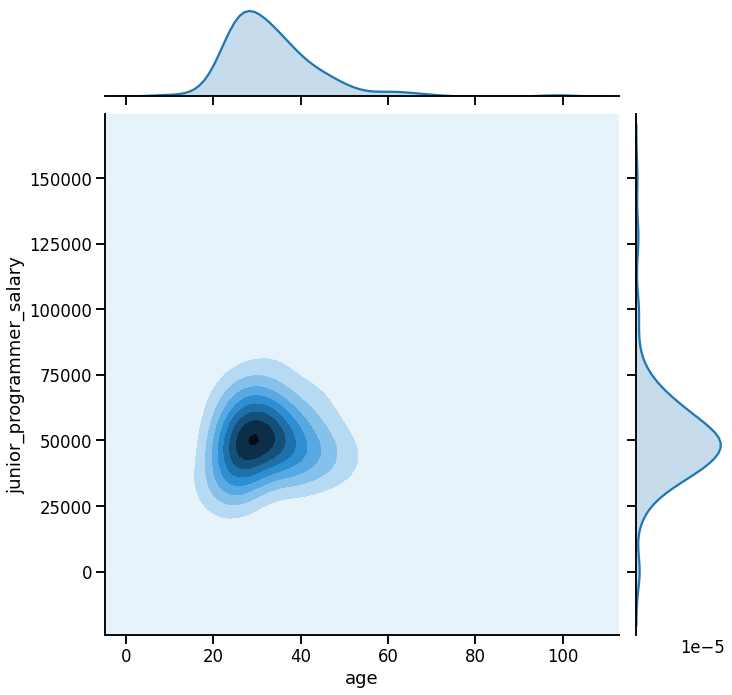

In [30]:
plt.figure(figsize=(8,8))
seaborn.jointplot(data=dataset, x='age',
                  y='junior_programmer_salary', kind='kde', height=10)
plt.show()

<Figure size 1080x432 with 0 Axes>

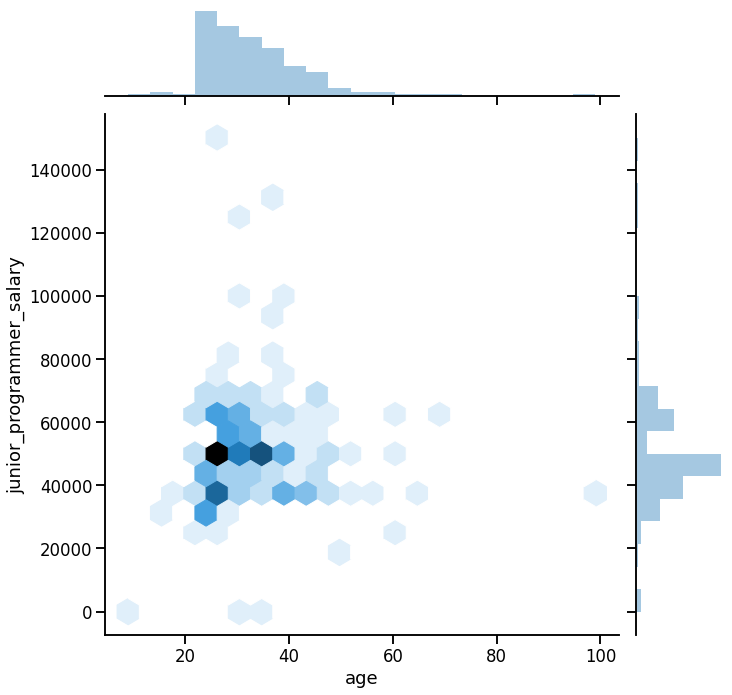

In [34]:
plt.figure(figsize=(15,6))
seaborn.jointplot(data=dataset, x='age',
                  y='junior_programmer_salary', kind='hex', height=10)
plt.show()

## Pairplots

Los pairplots son muy útiles para comparar muchas variables numéricas al mismo tiempo. Por ejemplo, se puede hacer una comparación entre la edad y ambas estimaciones de sueldo.

<Figure size 720x576 with 0 Axes>

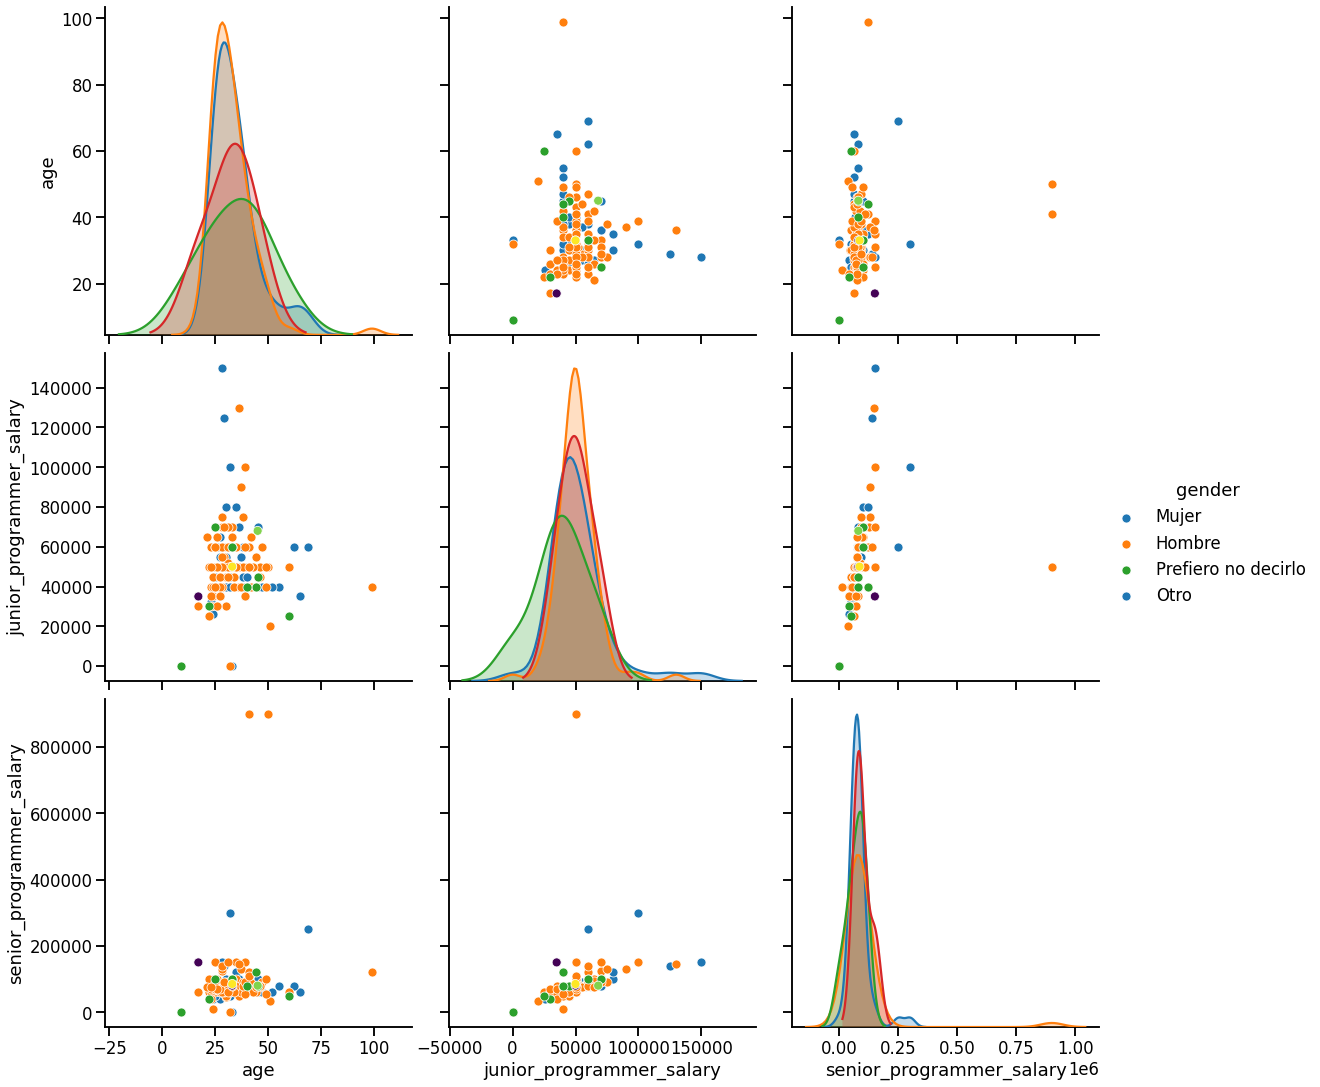

In [36]:
## TODO: maybe remove outliers
plt.figure(figsize=(10, 8))
seaborn.pairplot(
    data=dataset,
    vars=['age', 'junior_programmer_salary', 'senior_programmer_salary'],
    hue='gender', height=5)
plt.show()

Si bien este tipo de gráfico resume mucha información y nos permite buscar patrones visuales con gran rapidez, por eso mismo es difícil de explicar y lleva unos minutos de leer completamente. Por ello, es recomendable para medios gráficos como informes técnicos, pero no para presentaciones o piezas de divulgación.

## Combinaciones con cat plot

Uno de los aspectos más poderosos de seaborn es la habilidad de combinar distintos gráficos en filas y columnas con pocas líneas de código, a diferencia de otras librerías como matplotlib. La función [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) o `factorplot` en versiones anteriores permite usar los siguientes parámetros:
* Eje x e y para variables numéricas y/o categóricas, cada combinación con un gráfico distinto.
* Hue, o distinción por grupos por color.
* Filas y columnas para variables categóricas.

Al tener tantas posibilidades de combinaciones, se debe elegir con cuidado la jerarquía de los elementos gráficos de acuerdo a las comparaciones más importantes a realizar.

Este tipo de gráfico es útil, pero al igual que el `pairplot` sirve mucho para la exploración, y no tanto para la presentación de datos.

## Ejercicio

1. Explorar distintas combinaciones de variables usando catplots, de acuerdo al parámetro `kind`.

<Figure size 720x720 with 0 Axes>

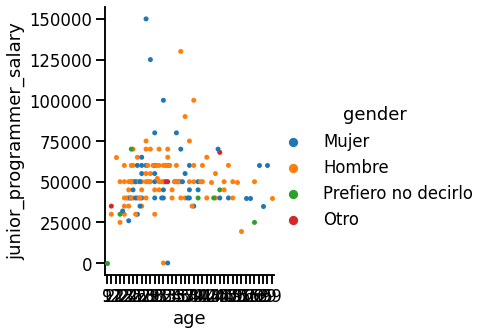

In [47]:
plt.figure(figsize=(10, 10))
seaborn.catplot(data=dataset, 
                x='age',
                y='junior_programmer_salary',
                hue='gender',
                kind='swarm')
seaborn.despine()
plt.show()